In [48]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 31)

In [47]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\Rohit\Desktop\creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [49]:
df.shape

(284807, 30)

In [5]:
df1=df.copy()
df1.rename(columns = {'V1':'accountNumber','V2':'customerId','V3':'creditLimit','V4':'availableMoney','V5':'transactionDateTime','V6':'transactionAmount','V7':'merchantName','V8':'acqCountry','V9':'merchantCountryCode','V10':'posEntryMode','V11':'posConditionCode','V12':'merchantCategoryCode','V13':'currentExpDate','V14':'accountOpenDate','V15':'dateOfLastAddressChange','V16':'cardCVV','V17':'enteredCVV','V18':'cardLast4Digits','V19':'transactionType','V20':',echoBuffer','V21':'currentBalance','V22':'merchantCity','V23':'merchantState','V24':'merchantZip','V25':'cardPresent','V26':'posOnPremises','V27':'recurringAuthInd','V28':'expirationDateKeyInMatch'}, inplace = True)
df1.head()

,Time,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,...,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.shape

(284807, 31)

In [7]:
 df.duplicated().sum()

1081

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   V1          284807 non-null  float64
 1   V2          284807 non-null  float64
 2   V3          284807 non-null  float64
 3   V4          284807 non-null  float64
 4   V5          284807 non-null  float64
 5   V6          284807 non-null  float64
 6   V7          284807 non-null  float64
 7   V8          284807 non-null  float64
 8   V9          284807 non-null  float64
 9   V10         284807 non-null  float64
 10  V11         284807 non-null  float64
 11  V12         284807 non-null  float64
 12  V13         284807 non-null  float64
 13  V14         284807 non-null  float64
 14  V15         284807 non-null  float64
 15  V16         284807 non-null  float64
 16  V17         284807 non-null  float64
 17  V18         284807 non-null  float64
 18  V19         284807 non-null  float64
 19  V2

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
df['Class'].unique()


array([0, 1], dtype=int64)

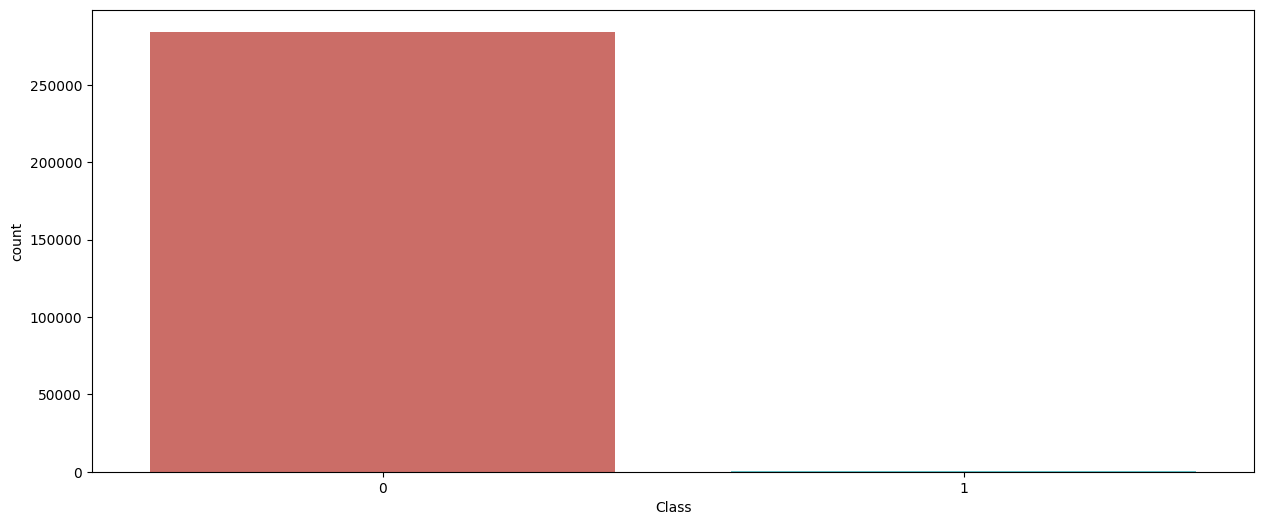

In [11]:
plt.figure(figsize=(15,6))
sns.countplot(x='Class', data = df, palette = 'hls') 
plt.show()

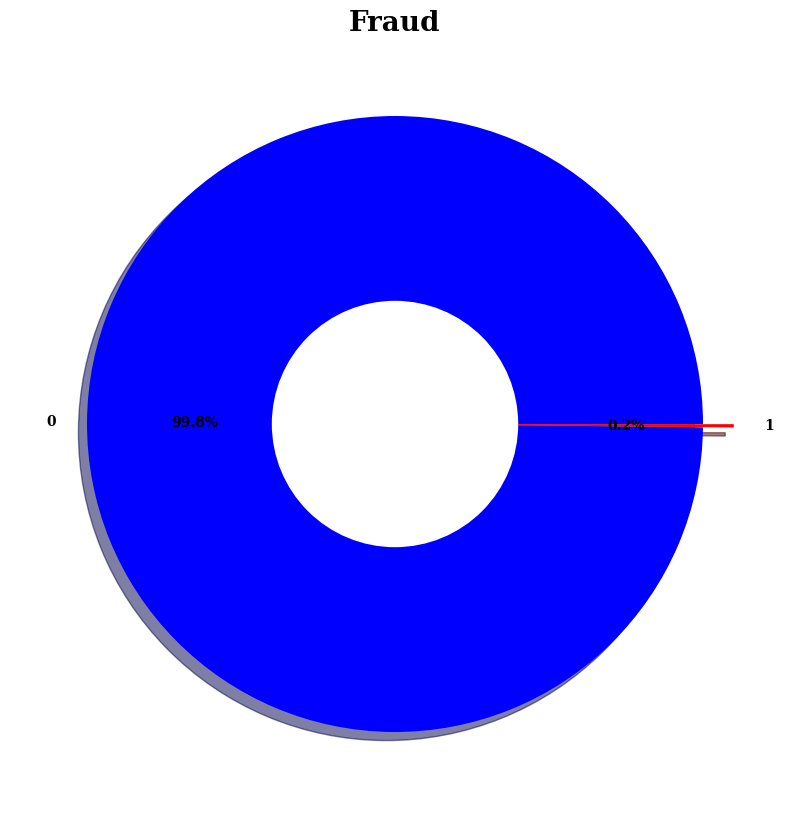

In [12]:
label_data = df['Class'].value_counts()

explode = (0.0, 0.1) 
plt.figure(figsize=(20, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index, 
                               colors = ['blue', 'red'], 
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 0,
                               explode = explode,
                               autopct = '%1.1f%%', 
                               textprops={ 'fontsize': 10,
                                          'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='black')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Fraud', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white') 
fig = plt.gcf() 
fig.gca().add_artist(centre_circle)
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [15]:
df['normAmount'] = StandardScaler().fit_transform(np.array(df['Amount']).reshape(-1, 1))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Time        284807 non-null  float64
 1   V1          284807 non-null  float64
 2   V2          284807 non-null  float64
 3   V3          284807 non-null  float64
 4   V4          284807 non-null  float64
 5   V5          284807 non-null  float64
 6   V6          284807 non-null  float64
 7   V7          284807 non-null  float64
 8   V8          284807 non-null  float64
 9   V9          284807 non-null  float64
 10  V10         284807 non-null  float64
 11  V11         284807 non-null  float64
 12  V12         284807 non-null  float64
 13  V13         284807 non-null  float64
 14  V14         284807 non-null  float64
 15  V15         284807 non-null  float64
 16  V16         284807 non-null  float64
 17  V17         284807 non-null  float64
 18  V18         284807 non-null  float64
 19  V1

In [17]:
df = df.drop(['Time', 'Amount'], axis = 1)

In [18]:
from sklearn.model_selection import train_test_split

In [54]:
X = df.drop(['Class'],axis='columns') 

In [55]:
y = df['Class']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.9995962167262832
Test Accuracy of KNN is 0.9996488887328394 

Confusion Matrix :- 
[[56867     1]
 [   19    75]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.99      0.80      0.88        94

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [59]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9993328885923949 

Confusion Matrix :- 
[[56850    18]
 [   20    74]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.80      0.79      0.80        94

    accuracy                           1.00     56962
   macro avg       0.90      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [60]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [61]:
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'splitter': 'best'}
0.9993987140380522


In [ ]:
#Oversampling using SMOTE 
#Synthetic Minority Oversampling Techniqe uses KNN algorithm to produce synthetic samples from the dataset
df2=df.copy()
X= df2.drop('class', axis='columns')
y=df2['class']

In [63]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)
y_sm.value_counts()
#random oversampling 
#from imblearn.over_sampling import RandomOverSampler as RoS
#ros=RoS(random_state=0)
#X_sm,y_sm=ros.fit_resample(X,y)
#random undersamping
#from imblearn.under_sampling import RandomUnderSampler as RuS
#rus=RuS(random_state=0)
#X_sm,y_sm=ros.fit_resample(X,y)
# lr=LogisticRegression()
# lr.fit(X_train,y_train)
# lr.score(X_test,y_test)

# print("Before OverSampling, counts of isfraud 'yes': {}".format(sum(y_train == 1)))
# print("Before OverSampling, counts of isfraud 'no': {} \n".format(sum(y_train == 0)))



Class
0    284315
1    284315
Name: count, dtype: int64

In [24]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X_sm, y_sm = sm.fit_resample(x,y)

y_sm.value_counts()


Class
0    284315
1    284315
Name: count, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)
# print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
# print("After OverSampling, counts of isfraud 'yes': {}".format(sum(y_train_res == 1)))
# print("After OverSampling, counts of isfraud 'no': {}".format(sum(y_train_res == 0)))
# x=y_train_res == 1
# y=y_train_res == 0

y_train.value_counts()

Class
0    227452
1    227452
Name: count, dtype: int64

In [66]:
y_test.value_counts()

Class
0    56863
1    56863
Name: count, dtype: int64

In [68]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier with SMOTE is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")


Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier with SMOTE is 0.9982941455779681 

Confusion Matrix :- 
[[56718   145]
 [   49 56814]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [27]:
#df.merchant= pd.to_numeric(df.merchant)
#df.category= pd.to_numeric(df.category)
#df.city= pd.to_numeric(df.city)
#df.info()
#X_train_miss, y_train_miss = sm.fit_resample(x,y)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn_df= df.copy() #copying original dataframe to use KNN

knn_X_train,knn_X_test,knn_y_train,knn_y_test=train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)
classifier=KNeighborsClassifier(n_neighbors=3)
classifier.fit(knn_X_train,knn_y_train)

#performance metrics
knn_acc = accuracy_score(knn_y_test, classifier.predict(knn_X_test))

print(f"Training Accuracy of KNN classifier without sampling is {accuracy_score(knn_y_train, classifier.predict(knn_X_train))}")
print(f"Test Accuracy of KNN classifier without sampling is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(knn_y_test, classifier.predict(knn_X_test))}\n")
print(f"Classification Report :- \n {classification_report(knn_y_test, classifier.predict(knn_X_test))}")

Training Accuracy of KNN classifier without sampling is 0.9996357172639294
Test Accuracy of KNN classifier without sampling is 0.9993679997191109 

Confusion Matrix :- 
[[56852    12]
 [   24    74]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.76      0.80        98

    accuracy                           1.00     56962
   macro avg       0.93      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [70]:
#KNN classifier with SMOTE 
knn_df2= df2.copy() #copy of df2 (uses SMOTE)

knn_X_train2,knn_X_test2,knn_y_train2,knn_y_test2=train_test_split(X_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)
classifier=KNeighborsClassifier(n_neighbors=3)
classifier.fit(knn_X_train2,knn_y_train2)

#performance metrics
knn_acc = accuracy_score(knn_y_test2, classifier.predict(knn_X_test2))

print(f"Training Accuracy of KNN (k=3) classifier with SMOTE is {accuracy_score(knn_y_train2, classifier.predict(knn_X_train2))}")
print(f"Test Accuracy of KNN (k=3) classifier with SMOTE is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(knn_y_test2, classifier.predict(knn_X_test2))}\n")
print(f"Classification Report :- \n {classification_report(knn_y_test2, classifier.predict(knn_X_test2))}")

Training Accuracy of KNN (k=3) classifier with SMOTE is 0.9997076306209662
Test Accuracy of KNN (k=3) classifier with SMOTE is 0.9993229340696059 

Confusion Matrix :- 
[[56786    77]
 [    0 56863]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [71]:
#Inference: SMOTE has  significant improvement on accuracy when KNN is used from 0.6 to 0.69

#KNN with K=5 (with SMOTE)
classifier2=KNeighborsClassifier(n_neighbors=5)
classifier2.fit(knn_X_train2,knn_y_train2)

#performance metrics
knn_acc = accuracy_score(knn_y_test2, classifier2.predict(knn_X_test2))

print(f"Training Accuracy of KNN classifier without sampling and K=5 is {accuracy_score(knn_y_train2, classifier2.predict(knn_X_train2))}")
print(f"Test Accuracy of KNN classifier without sampling and K=5 is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(knn_y_test2, classifier2.predict(knn_X_test2))}\n")
print(f"Classification Report :- \n {classification_report(knn_y_test2, classifier2.predict(knn_X_test2))}")

Training Accuracy of KNN classifier without sampling and K=5 is 0.9993756924537924
Test Accuracy of KNN classifier without sampling and K=5 is 0.999041556020611 

Confusion Matrix :- 
[[56754   109]
 [    0 56863]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [72]:
#inference: with k=5, lowered accuracy from 0.71 to 0.7

#KNN with k=7 with SMOTE
classifier3=KNeighborsClassifier(n_neighbors=7)
classifier3.fit(knn_X_train2,knn_y_train2)

#performance metrics
knn_acc = accuracy_score(knn_y_test2, classifier3.predict(knn_X_test2))

print(f"Training Accuracy of KNN classifier without sampling and K=7 is {accuracy_score(knn_y_train2, classifier3.predict(knn_X_train2))}")
print(f"Test Accuracy of KNN classifier without sampling and K=7 is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(knn_y_test2, classifier3.predict(knn_X_test2))}\n")
print(f"Classification Report :- \n {classification_report(knn_y_test2, classifier3.predict(knn_X_test2))}")

Training Accuracy of KNN classifier without sampling and K=7 is 0.9990591421486731
Test Accuracy of KNN classifier without sampling and K=7 is 0.9987162126514605 

Confusion Matrix :- 
[[56717   146]
 [    0 56863]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [73]:
#inference: with k=7, the accuracy is lowered further from 0.7 to 0.67
#KNN with k=9
classifier4=KNeighborsClassifier(n_neighbors=9)
classifier4.fit(knn_X_train2,knn_y_train2)

#performance metrics
knn_acc = accuracy_score(knn_y_test2, classifier4.predict(knn_X_test2))

print(f"Training Accuracy of KNN classifier without sampling and K=9 is {accuracy_score(knn_y_train2, classifier4.predict(knn_X_train2))}")
print(f"Test Accuracy of KNN classifier without sampling and K=9 is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(knn_y_test2, classifier4.predict(knn_X_test2))}\n")
print(f"Classification Report :- \n {classification_report(knn_y_test2, classifier4.predict(knn_X_test2))}")

Training Accuracy of KNN classifier without sampling and K=9 is 0.9987865571637092
Test Accuracy of KNN classifier without sampling and K=9 is 0.9984084554103723 

Confusion Matrix :- 
[[56682   181]
 [    0 56863]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [74]:
#Logistic regression (with SMOTE)
#X_train,X_test, y_train, y_test already sampled using SMOTE

from sklearn.linear_model import LogisticRegression
logistic_regressor= LogisticRegression(random_state=16).fit(X_train, y_train)
y_pred = logistic_regressor.predict(X_test)
log_acc = accuracy_score(y_test, y_pred)

log_acc = accuracy_score(y_test, logistic_regressor.predict(X_test))

print(f"Training Accuracy of logistic regression with SMOTE 9 is {accuracy_score(y_train, logistic_regressor.predict(X_train))}")
print(f"Test Accuracy of logistic regression with SMOTE is {log_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, logistic_regressor.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, logistic_regressor.predict(X_test))}")

Training Accuracy of logistic regression with SMOTE 9 is 0.94608312962735
Test Accuracy of logistic regression with SMOTE is 0.9455093821993211 

Confusion Matrix :- 
[[55462  1401]
 [ 4796 52067]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     56863
           1       0.97      0.92      0.94     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



In [75]:
#Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
NB_clf = GaussianNB()

# Model training
NB_clf.fit(X_train, y_train)

y_pred = NB_clf.predict(X_test)


nb_acc = accuracy_score(y_test, NB_clf.predict(X_test))

print(f"Training Accuracy of Naive Bayes with SMOTE 9 is {accuracy_score(y_train, NB_clf.predict(X_train))}")
print(f"Test Accuracy of Naive Bayes with SMOTE is {nb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, NB_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, NB_clf.predict(X_test))}")

Training Accuracy of Naive Bayes with SMOTE 9 is 0.9142456430367726
Test Accuracy of Naive Bayes with SMOTE is 0.9134234915498655 

Confusion Matrix :- 
[[55533  1330]
 [ 8516 48347]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     56863
           1       0.97      0.85      0.91     56863

    accuracy                           0.91    113726
   macro avg       0.92      0.91      0.91    113726
weighted avg       0.92      0.91      0.91    113726



              precision    recall  f1-score   support

   not fraud       1.00      1.00      1.00     56863
       fraud       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



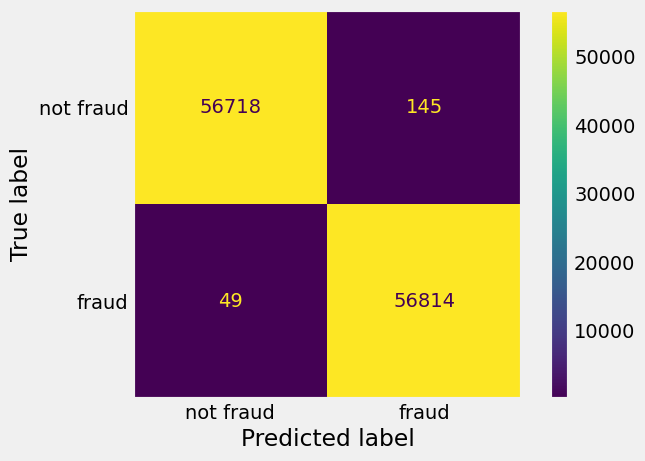

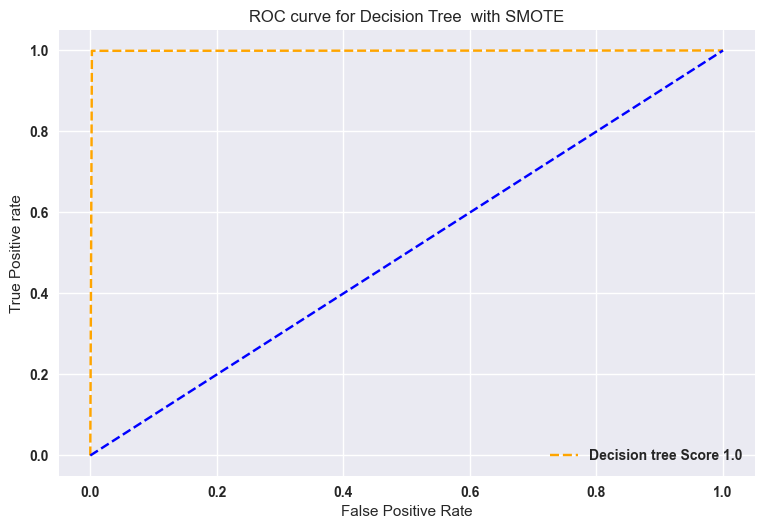

In [76]:
#decision tree roc 
from sklearn.metrics import accuracy_score,classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

#Predict the response for test dataset
y_pred_ab = dtc.predict(X_test) 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_ab)

target_names=['not fraud','fraud']
print(classification_report(y_test, y_pred_ab,target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.grid(False)
font = {'family' : 'Comic Sans MS',
    'weight' : 'bold',
    'size'   : 18}
plt.rc('font', **font)
plt.show()


# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, dtc.predict_proba(X_test)[:, 1], pos_label=1)


#We can also plot the receiver operating characteristic curves 
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
AUC_Score_ab=round(roc_auc_score(y_test, dtc.predict_proba(X_test)[:, 1]),2)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision tree Score '+str(AUC_Score_ab))

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve for Decision Tree  with SMOTE')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [77]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the decision tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Get the root node
root_node = dtc.tree_.feature[0]

print("Root node feature index:", root_node)

Root node feature index: 13


              precision    recall  f1-score   support

   not fraud       1.00      1.00      1.00     56863
       fraud       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



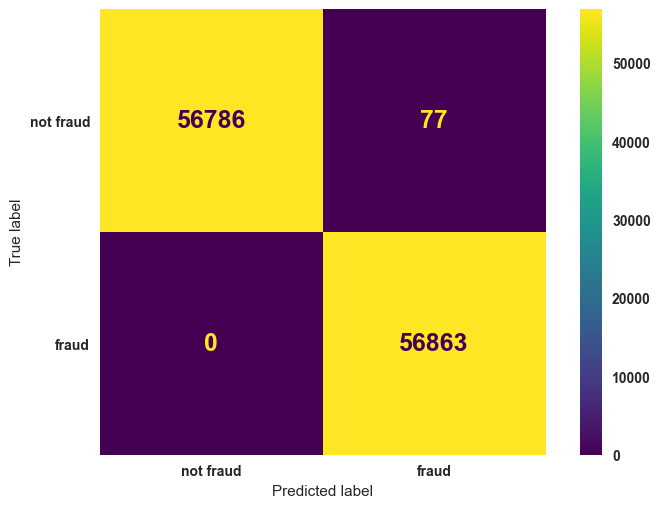

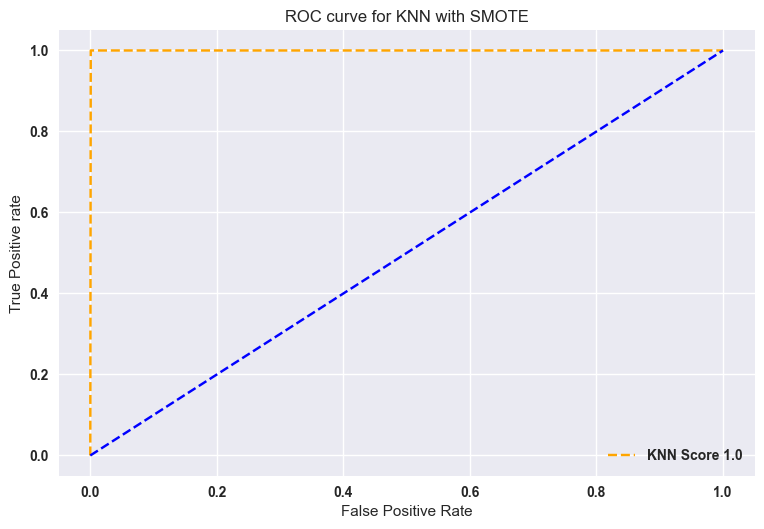

In [82]:
#roc for KNN n=3 with smote
from sklearn.metrics import accuracy_score,classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

#Predict the response for test dataset
y_pred_ab = classifier.predict(X_test) 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_ab)

target_names=['not fraud','fraud']
print(classification_report(y_test, y_pred_ab,target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.grid(False)
font = {'family' : 'Comic Sans MS',
    'weight' : 'bold',
    'size'   : 18}
plt.rc('font', **font)
plt.show()


# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1], pos_label=1)


#We can also plot the receiver operating characteristic curves 
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
AUC_Score_ab=round(roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1]),2)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='KNN Score '+str(AUC_Score_ab))

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve for KNN with SMOTE')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

              precision    recall  f1-score   support

   not fraud       0.87      0.98      0.92     56863
       fraud       0.97      0.85      0.91     56863

    accuracy                           0.91    113726
   macro avg       0.92      0.91      0.91    113726
weighted avg       0.92      0.91      0.91    113726



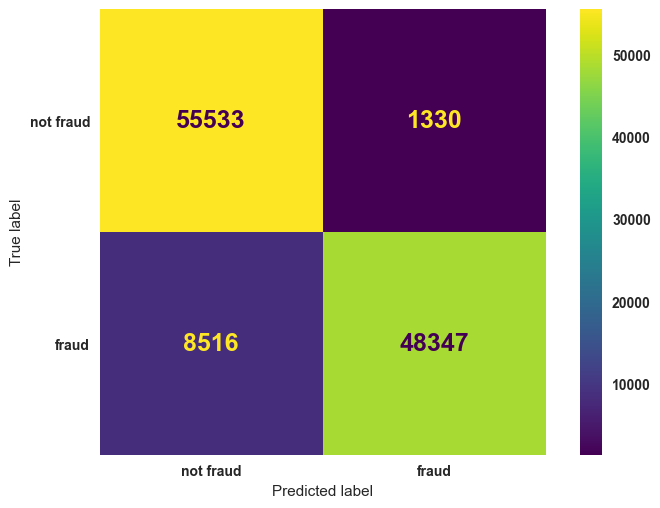

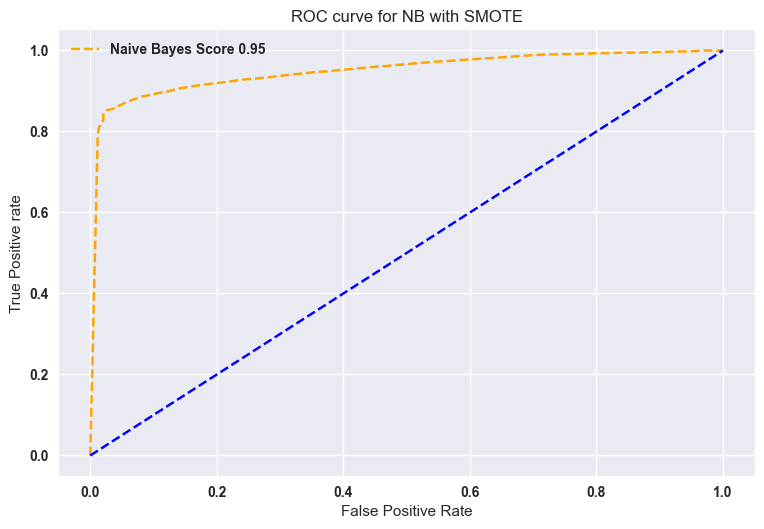

In [83]:
#roc for naive bayes NB_clf
from sklearn.metrics import accuracy_score,classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

#Predict the response for test dataset
y_pred_ab = NB_clf.predict(X_test) 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_ab)

target_names=['not fraud','fraud']
print(classification_report(y_test, y_pred_ab,target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.grid(False)
font = {'family' : 'Comic Sans MS',
    'weight' : 'bold',
    'size'   : 18}
plt.rc('font', **font)
plt.show()


# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, NB_clf.predict_proba(X_test)[:, 1], pos_label=1)


#We can also plot the receiver operating characteristic curves 
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
AUC_Score_ab=round(roc_auc_score(y_test, NB_clf.predict_proba(X_test)[:, 1]),2)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Naive Bayes Score '+str(AUC_Score_ab))

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve for NB with SMOTE')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

              precision    recall  f1-score   support

   not fraud       0.92      0.98      0.95     56863
       fraud       0.97      0.92      0.94     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



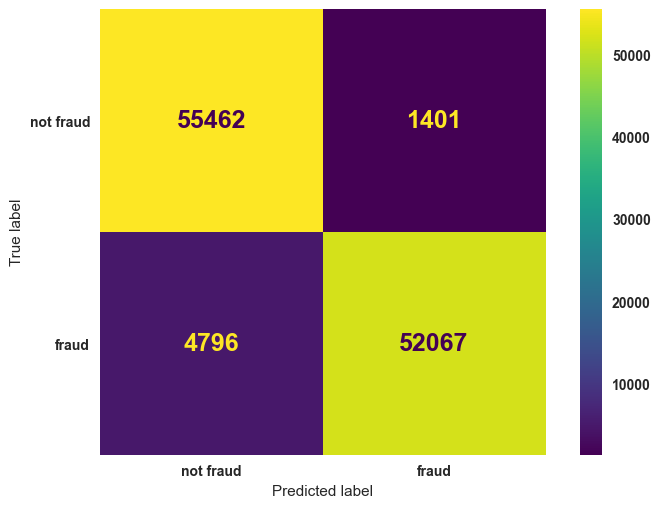

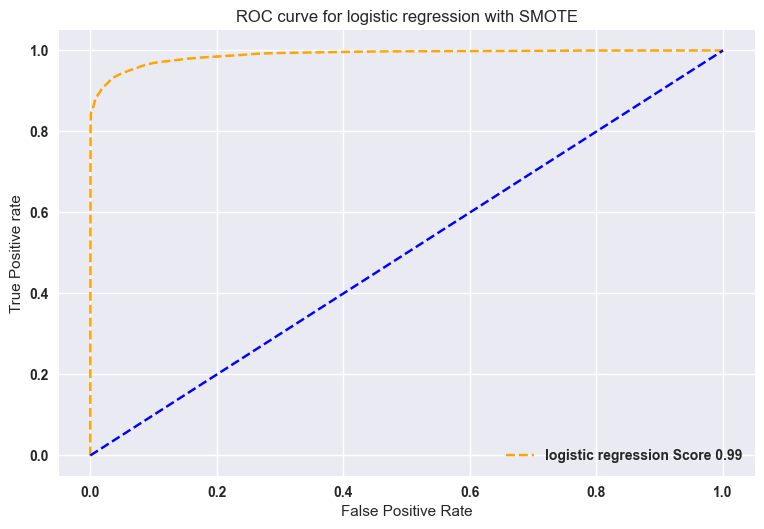

In [84]:
#roc for Logistic Regression logistic_regressor
from sklearn.metrics import accuracy_score,classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

#Predict the response for test dataset
y_pred_ab = logistic_regressor.predict(X_test) 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_ab)

target_names=['not fraud','fraud']
print(classification_report(y_test, y_pred_ab,target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.grid(False)
font = {'family' : 'Comic Sans MS',
    'weight' : 'bold',
    'size'   : 18}
plt.rc('font', **font)
plt.show()


# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, logistic_regressor.predict_proba(X_test)[:, 1], pos_label=1)


#We can also plot the receiver operating characteristic curves 
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
AUC_Score_ab=round(roc_auc_score(y_test, logistic_regressor.predict_proba(X_test)[:, 1]),2)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='logistic regression Score '+str(AUC_Score_ab))

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve for logistic regression with SMOTE')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

              precision    recall  f1-score   support

   not fraud       0.92      0.98      0.95     56863
       fraud       0.97      0.92      0.94     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



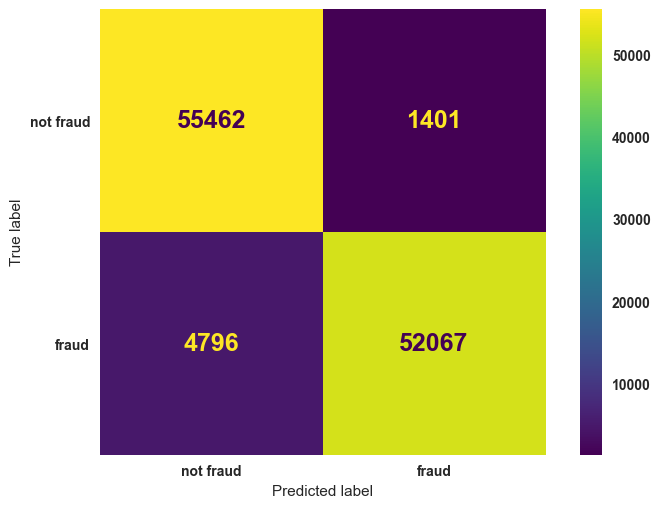

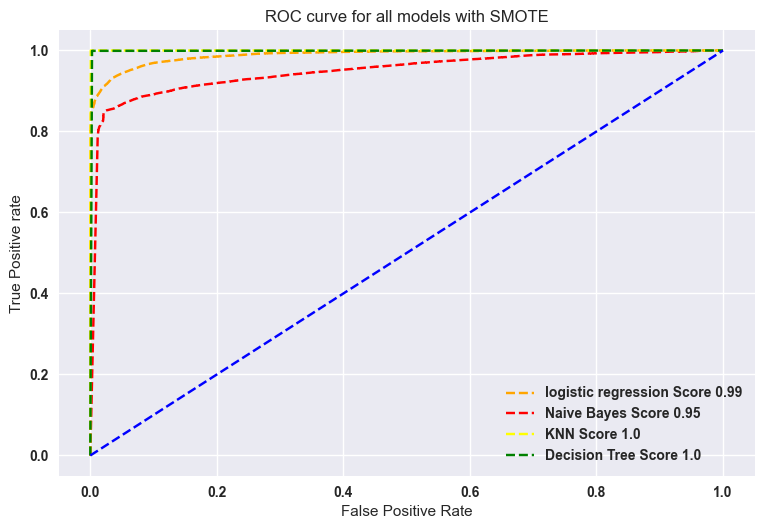

In [85]:
#roc curve for multiple models
#roc for all models
#classifier: knn
#dtc: decision tree
#NB_clf: naive bayes
#logistic_regressor: logistic regression
from sklearn.metrics import accuracy_score,classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

#Predict the response for test dataset
y_pred_ab = logistic_regressor.predict(X_test) 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_ab)

target_names=['not fraud','fraud']
print(classification_report(y_test, y_pred_ab,target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.grid(False)
font = {'family' : 'Comic Sans MS',
    'weight' : 'bold',
    'size'   : 18}
plt.rc('font', **font)
plt.show()


# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, logistic_regressor.predict_proba(X_test)[:, 1], pos_label=1)
fpr2,tpr2,thresh2=roc_curve(y_test, NB_clf.predict_proba(X_test)[:,1],pos_label=1 )
fpr3,tpr3,thresh3=roc_curve(y_test,classifier.predict_proba(X_test)[:,1],pos_label=1)
fpr4,tpr4,thresh4=roc_curve(y_test,dtc.predict_proba(X_test)[:,1],pos_label=1)
#We can also plot the receiver operating characteristic curves 
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
AUC_Score_lr=round(roc_auc_score(y_test, logistic_regressor.predict_proba(X_test)[:, 1]),2)
AUC_Score_nb=round(roc_auc_score(y_test, NB_clf.predict_proba(X_test)[:,1]),2)
AUC_Score_kn=round(roc_auc_score(y_test,classifier.predict_proba(X_test)[:,1]),2)
AUC_Score_dt=round(roc_auc_score(y_test,dtc.predict_proba(X_test)[:,1]),2)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='logistic regression Score '+str(AUC_Score_lr))
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes Score '+str(AUC_Score_nb))
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='KNN Score '+str(AUC_Score_kn))
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='Decision Tree Score '+str(AUC_Score_dt))



plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve for all models with SMOTE')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();